- 지도 학습, 교사학습
- 가장 널리, 가장 성공적으로 사용되는 머신러닝 방법
- 입력과 출력 샘플이 쌍으로 준비되어 있어야 합니다.
- 출력 샘플을 만들기 위해서 사람의 노력이 필요합니다

### 2.1 분류와 회귀
- 분류는 여러 클래스 레이블 중 하나를 예측(A,B,C)
- 회귀는 연속적인 숫자 예측(내일 집값 1% 상승, 수치 예상)
- 실제로는 분류나 회귀나 같은 원리 입니다.

### 2.2 일반화, 과대적합, 과소적합
- 처음보는 데이터에 대해서도 모델이 훈련세트에서 테스트 세트로 일반화 되었다. generalization(최적, 목표)
- 학습할때는 잘됐는데, 테스트셋에는 예측이 잘 안된다 : 과대적합(overfitting)되었다.
- 학습도 잘 안되고, 테스트셋도잘 안된다 : 과소적합(undergitting)되었다.

## 2.3.1 예제에 사용할 데이터셋

In [31]:
#p.58
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Text(0, 0.5, '두번째 특성')

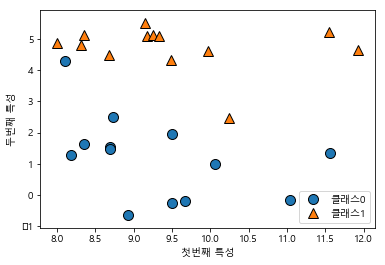

In [32]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.rc('font', family='Malgun Gothic')
plt.legend(['클래스0', '클래스1'])
plt.xlabel('첫번째 특성')
plt.ylabel('두번째 특성')


Text(0, 0.5, '타깃')

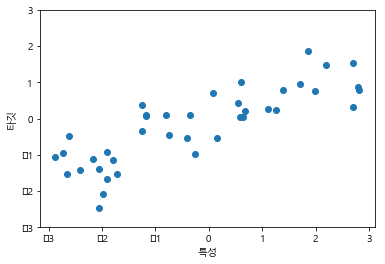

In [33]:
#59
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('특성')
plt.ylabel('타깃')

In [48]:
#60
from sklearn.datasets import load_breast_cancer # 소문자로 시작하면 함수
cancer = load_breast_cancer() #병원에서 만든 유방암 환자들의 데이터
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [49]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [50]:
cancer.data.shape

(569, 30)

In [51]:
cancer.target_names # 목표 : 악성, 양성

array(['malignant', 'benign'], dtype='<U9')

In [52]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

## 2.3.2 k-최근접 이웃(k-Nearest Neighbors)
훈련데이터셋에서 가장 가까운 데이터 포인트, 즉 '최근접 이웃'을 찾습니다

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


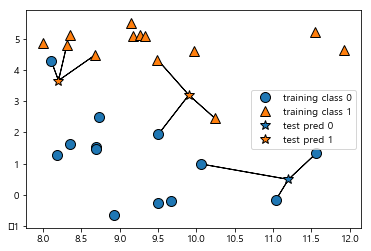

In [42]:
#p.63
mglearn.plots.plot_knn_classification(n_neighbors=3)
# n_neighbors : 가장 가까운 개체 수 

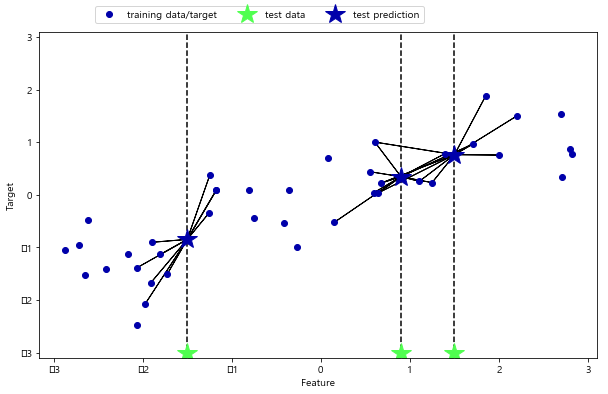

In [47]:
# 69 classifer 분류 > regerssion 예측
mglearn.plots.plot_knn_regression(n_neighbors=10)
# neighnors 이 다수일 경우 평균값 산출

In [ ]:
# 유방암 분류 KNN Classifier / 회귀 KNN Regressor

In [53]:
import sklearn.datasets as datasets

In [55]:
cancer = datasets.load_breast_cancer()

In [59]:
cancer.data.shape, cancer.target_names

((569, 30), array(['malignant', 'benign'], dtype='<U9'))

In [61]:
cancer.target_names = ['악성', '양성']
cancer.target_names

['악성', '양성']

In [63]:
# 모델이 믿을 수 있는지 테스트 해봐야 하므로 데이터를 75% 학습용
# 25%는 테스트용
# KNN Classifier 로 분류, 학습용 데이터로 피팅, 테스트용 데이터로 성능 측정


In [82]:
from sklearn.model_selection import train_test_split
x = cancer.data
y = cancer.target
x_train, x_test, y_train, y_test =  train_test_split(x,y) # 75 : 25 로 분류
x.shape, x_train.shape, x_test.shape

((569, 30), (426, 30), (143, 30))

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [88]:
knn.score(x_train, y_train) , knn.score(x_test, y_test)

(1.0, 0.916083916083916)